- Categorize by weight class
    - Prdiction for each class

In [15]:
import pandas as pd

# Load the CSV files to examine their contents
events_df = pd.read_csv(r'C:\Users\d1411\Документы\Python Projects\Final Project\data\csv\events_processed\events_combined.csv')
fighters_df = pd.read_csv(r'C:\Users\d1411\Документы\Python Projects\Final Project\data\csv\fighters_processed\fighters_combined.csv')

# Display the first few rows of each to understand their structure and assess initial cleaning needs
events_df.head(), fighters_df.head()

(   Event_Date                Event_Location  W_L           Fighter_A  \
 0  2022-09-03  Paris, Ile-de-France, France  win          Ciryl Gane   
 1  2022-09-03  Paris, Ile-de-France, France  win    Robert Whittaker   
 2  2022-09-03  Paris, Ile-de-France, France  win  Nassourdine Imavov   
 3  2022-09-03  Paris, Ile-de-France, France  win       Roman Kopylov   
 4  2022-09-03  Paris, Ile-de-France, France  win       William Gomis   
 
             Fighter_B  KD_A  KD_B  STR_A  STR_B  TD_A  TD_B  SUB_A  SUB_B  \
 0         Tai Tuivasa   1.0   1.0  110.0   29.0   0.0   0.0    0.0    0.0   
 1      Marvin Vettori   0.0   0.0   74.0   33.0   1.0   0.0    0.0    0.0   
 2     Joaquin Buckley   0.0   0.0   51.0   46.0   2.0   0.0    2.0    0.0   
 3  Alessio Di Chirico   1.0   0.0   59.0   39.0   0.0   0.0    0.0    0.0   
 4        Jarno Errens   0.0   0.0   32.0   20.0   3.0   0.0    0.0    1.0   
 
     Weight_Class  Method Method_Detail  Round  Time          event_id  \
 0    Heavyweigh

In [2]:
fighters_df.shape

(2619, 16)

In [16]:
fighters_a = fighters_df[['Name', 'Height', 'Weight', 'Reach', 'STANCE', 'fighter_id', 'DOB']].rename(
    columns={
        'Name': 'Name_A',
        'Height': 'Height_A',
        'Weight': 'Weight_A',
        'Reach': 'Reach_A',
        'STANCE': 'Stance_A',
        'fighter_id': 'Fighter_A_id',
        'DOB': 'DOB_A',
    })

fighters_a

,Name_A,Height_A,Weight_A,Reach_A,Stance_A,Fighter_A_id,DOB_A
0,Gabriel Silva,167.64,61.23492,180.34,Orthodox,002ca196477ce572,1994-08-26
1,Aalon Cruz,182.88,65.77084,198.12,Switch,003d82fa384ca1d0,1989-09-20
2,Davi Ramos,167.64,70.30676,177.80,Orthodox,0052de90691d4a93,1986-11-05
3,Sean McCorkle,200.66,120.20188,205.74,Orthodox,008dc37cca279def,1976-07-17
4,Jeff Molina,167.64,56.69900,175.26,Orthodox,008ea710276c9606,1997-07-17
...,...,...,...,...,...,...,...
2619,Quinton Jackson,185.42,92.98636,185.42,Orthodox,ffc088e64fab57e9,1978-06-20
2620,Johnny Bedford,177.80,61.23492,180.34,Orthodox,ffc3e6daaa6da0b7,1983-01-06
2621,Jean Matsumoto,167.64,61.23492,172.72,Orthodox,ffd3224638c01b57,1999-09-09
2622,Jessica Rakoczy,170.18,52.16308,NaN,Orthodox,ffdeb4fbea09ce75,1977-04-14


In [17]:
fighters_b = fighters_df[['Name', 'Height', 'Weight', 'Reach', 'STANCE', 'fighter_id', 'DOB']].rename(
    columns={
        'Name': 'Name_B',
        'Height': 'Height_B',
        'Weight': 'Weight_B',
        'Reach': 'Reach_B',
        'STANCE': 'Stance_B',
        'fighter_id': 'Fighter_B_id',
        'DOB': 'DOB_B',
    })

fighters_b

,Name_B,Height_B,Weight_B,Reach_B,Stance_B,Fighter_B_id,DOB_B
0,Gabriel Silva,167.64,61.23492,180.34,Orthodox,002ca196477ce572,1994-08-26
1,Aalon Cruz,182.88,65.77084,198.12,Switch,003d82fa384ca1d0,1989-09-20
2,Davi Ramos,167.64,70.30676,177.80,Orthodox,0052de90691d4a93,1986-11-05
3,Sean McCorkle,200.66,120.20188,205.74,Orthodox,008dc37cca279def,1976-07-17
4,Jeff Molina,167.64,56.69900,175.26,Orthodox,008ea710276c9606,1997-07-17
...,...,...,...,...,...,...,...
2619,Quinton Jackson,185.42,92.98636,185.42,Orthodox,ffc088e64fab57e9,1978-06-20
2620,Johnny Bedford,177.80,61.23492,180.34,Orthodox,ffc3e6daaa6da0b7,1983-01-06
2621,Jean Matsumoto,167.64,61.23492,172.72,Orthodox,ffd3224638c01b57,1999-09-09
2622,Jessica Rakoczy,170.18,52.16308,NaN,Orthodox,ffdeb4fbea09ce75,1977-04-14


In [18]:
events_df

,Event_Date,Event_Location,W_L,Fighter_A,Fighter_B,KD_A,KD_B,STR_A,STR_B,TD_A,TD_B,SUB_A,SUB_B,Weight_Class,Method,Method_Detail,Round,Time,event_id,Time_seconds
0,2022-09-03,"Paris, Ile-de-France, France",win,Ciryl Gane,Tai Tuivasa,1.0,1.0,110.0,29.0,0.0,0.0,0.0,0.0,Heavyweight,KO/TKO,Punches,3,4:23,00a905a4a4a2b071,263
1,2022-09-03,"Paris, Ile-de-France, France",win,Robert Whittaker,Marvin Vettori,0.0,0.0,74.0,33.0,1.0,0.0,0.0,0.0,Middleweight,U-DEC,NaN,3,5:00,00a905a4a4a2b071,300
2,2022-09-03,"Paris, Ile-de-France, France",win,Nassourdine Imavov,Joaquin Buckley,0.0,0.0,51.0,46.0,2.0,0.0,2.0,0.0,Middleweight,U-DEC,NaN,3,5:00,00a905a4a4a2b071,300
3,2022-09-03,"Paris, Ile-de-France, France",win,Roman Kopylov,Alessio Di Chirico,1.0,0.0,59.0,39.0,0.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,3,1:09,00a905a4a4a2b071,69
4,2022-09-03,"Paris, Ile-de-France, France",win,William Gomis,Jarno Errens,0.0,0.0,32.0,20.0,3.0,0.0,0.0,1.0,Featherweight,U-DEC,NaN,3,5:00,00a905a4a4a2b071,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,2017-07-29,"Anaheim, California, USA",win,Brian Ortega,Renato Moicano,0.0,0.0,65.0,109.0,0.0,2.0,1.0,0.0,Featherweight,SUB,Guillotine Choke,3,2:59,ff9578cdbfabd323,179
7907,2017-07-29,"Anaheim, California, USA",win,Calvin Kattar,Andre Fili,0.0,0.0,75.0,73.0,2.0,0.0,0.0,0.0,Featherweight,U-DEC,NaN,3,5:00,ff9578cdbfabd323,300
7908,2017-07-29,"Anaheim, California, USA",win,Aleksandra Albu,Kailin Curran,0.0,0.0,82.0,86.0,5.0,1.0,0.0,0.0,Women's Strawweight,U-DEC,NaN,3,5:00,ff9578cdbfabd323,300
7909,2017-07-29,"Anaheim, California, USA",win,Jarred Brooks,Eric Shelton,0.0,0.0,27.0,31.0,5.0,1.0,1.0,1.0,Flyweight,S-DEC,NaN,3,5:00,ff9578cdbfabd323,300


In [13]:
events_df.dtypes

Event_Date         object
Event_Location     object
W_L                object
Fighter_A          object
Fighter_B          object
KD_A              float64
KD_B              float64
STR_A             float64
STR_B             float64
TD_A              float64
TD_B              float64
SUB_A             float64
SUB_B              object
Weight_Class       object
Method             object
Method_Detail      object
Round               int64
Time               object
event_id           object
Time_seconds        int64
dtype: object

In [14]:

fighters_df.dtypes

Name           object
Record         object
Height        float64
Weight        float64
Reach         float64
STANCE         object
DOB            object
SLpM          float64
Str. Acc.     float64
SApM          float64
Str. Def      float64
TD Avg.       float64
TD Acc.       float64
TD Def.       float64
Sub. Avg.     float64
fighter_id     object
dtype: object

In [19]:
events_with_fighters = events_df.merge(
    fighters_a, left_on='Fighter_A', right_on='Name_A', how='left'
).merge(
    fighters_b, left_on='Fighter_B', right_on='Name_B', how='left'
)

events_with_fighters


,Event_Date,Event_Location,W_L,Fighter_A,Fighter_B,KD_A,KD_B,STR_A,STR_B,TD_A,...,Stance_A,Fighter_A_id,DOB_A,Name_B,Height_B,Weight_B,Reach_B,Stance_B,Fighter_B_id,DOB_B
0,2022-09-03,"Paris, Ile-de-France, France",win,Ciryl Gane,Tai Tuivasa,1.0,1.0,110.0,29.0,0.0,...,Orthodox,787bb1f087ccff8a,1990-04-12,Tai Tuivasa,187.96,119.748288,190.50,Southpaw,c62fbc117d57b943,1993-03-16
1,2022-09-03,"Paris, Ile-de-France, France",win,Robert Whittaker,Marvin Vettori,0.0,0.0,74.0,33.0,1.0,...,Orthodox,e1147d3d2dabe1ce,1990-12-20,Marvin Vettori,182.88,83.914520,187.96,Southpaw,7acbb0972e75281a,1993-09-20
2,2022-09-03,"Paris, Ile-de-France, France",win,Nassourdine Imavov,Joaquin Buckley,0.0,0.0,51.0,46.0,2.0,...,Orthodox,881bf86d4cba8578,1995-03-01,Joaquin Buckley,177.80,77.110640,193.04,Southpaw,b9437600497350f3,1994-04-27
3,2022-09-03,"Paris, Ile-de-France, France",win,Roman Kopylov,Alessio Di Chirico,1.0,0.0,59.0,39.0,0.0,...,Southpaw,9d83f6da776ff7d6,1991-05-04,Alessio Di Chirico,182.88,83.914520,187.96,Orthodox,77d7295d1b22c694,1989-12-12
4,2022-09-03,"Paris, Ile-de-France, France",win,William Gomis,Jarno Errens,0.0,0.0,32.0,20.0,3.0,...,Southpaw,e1d40e8782d80bc2,1997-06-13,Jarno Errens,180.34,65.770840,185.42,Orthodox,082eba4cd80f736f,1994-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7923,2017-07-29,"Anaheim, California, USA",win,Brian Ortega,Renato Moicano,0.0,0.0,65.0,109.0,0.0,...,Switch,def8166ff24bd237,1991-02-21,Renato Moicano,180.34,70.306760,182.88,Orthodox,b6452706b373eea1,1989-05-21
7924,2017-07-29,"Anaheim, California, USA",win,Calvin Kattar,Andre Fili,0.0,0.0,75.0,73.0,2.0,...,Orthodox,751de04455cfaac0,1988-03-26,Andre Fili,180.34,65.770840,187.96,Orthodox,8fd808923cffff82,1990-06-25
7925,2017-07-29,"Anaheim, California, USA",win,Aleksandra Albu,Kailin Curran,0.0,0.0,82.0,86.0,5.0,...,Orthodox,e76d9f656ceb82ab,1990-07-14,Kailin Curran,162.56,52.163080,165.10,Orthodox,05b43e0ead3df345,1991-04-11
7926,2017-07-29,"Anaheim, California, USA",win,Jarred Brooks,Eric Shelton,0.0,0.0,27.0,31.0,5.0,...,Switch,81d9df19e255b8b6,1993-05-02,Eric Shelton,167.64,56.699000,172.72,Orthodox,a0c64f272b65d441,1991-02-02


In [11]:
events_with_fighters.to_csv('events_with_fighters.csv', index=False)


In [20]:
events_with_fighters.groupby(['Weight_Class']).count()

,Event_Date,Event_Location,W_L,Fighter_A,Fighter_B,KD_A,KD_B,STR_A,STR_B,TD_A,...,Stance_A,Fighter_A_id,DOB_A,Name_B,Height_B,Weight_B,Reach_B,Stance_B,Fighter_B_id,DOB_B
Weight_Class,,,,,,,,,,,,,,,,,,,,,
Bantamweight,693,693,693,693,693,693,693,693,693,693,...,691,693,693,693,693,693,655,687,693,693
Catch Weight,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,63,67,67,67
Featherweight,769,769,769,769,769,769,769,769,769,769,...,769,769,769,769,769,769,723,765,769,769
Flyweight,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,343,359,359,359
Heavyweight,716,716,716,716,716,714,714,714,714,714,...,714,716,706,716,714,714,554,711,716,679
Light Heavyweight,691,691,691,691,691,691,691,691,691,691,...,690,691,691,691,690,691,622,688,691,682
Lightweight,1354,1354,1354,1354,1354,1350,1350,1350,1350,1350,...,1351,1354,1344,1354,1348,1350,1177,1337,1354,1322
Middleweight,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,...,1055,1056,1051,1056,1054,1054,910,1051,1056,1036
Open Weight,117,117,117,117,117,102,102,102,102,102,...,111,117,69,117,106,106,1,93,117,33


In [2]:
events_df.shape

(15822, 18)

In [3]:
fighters_df.shape

(223, 14)

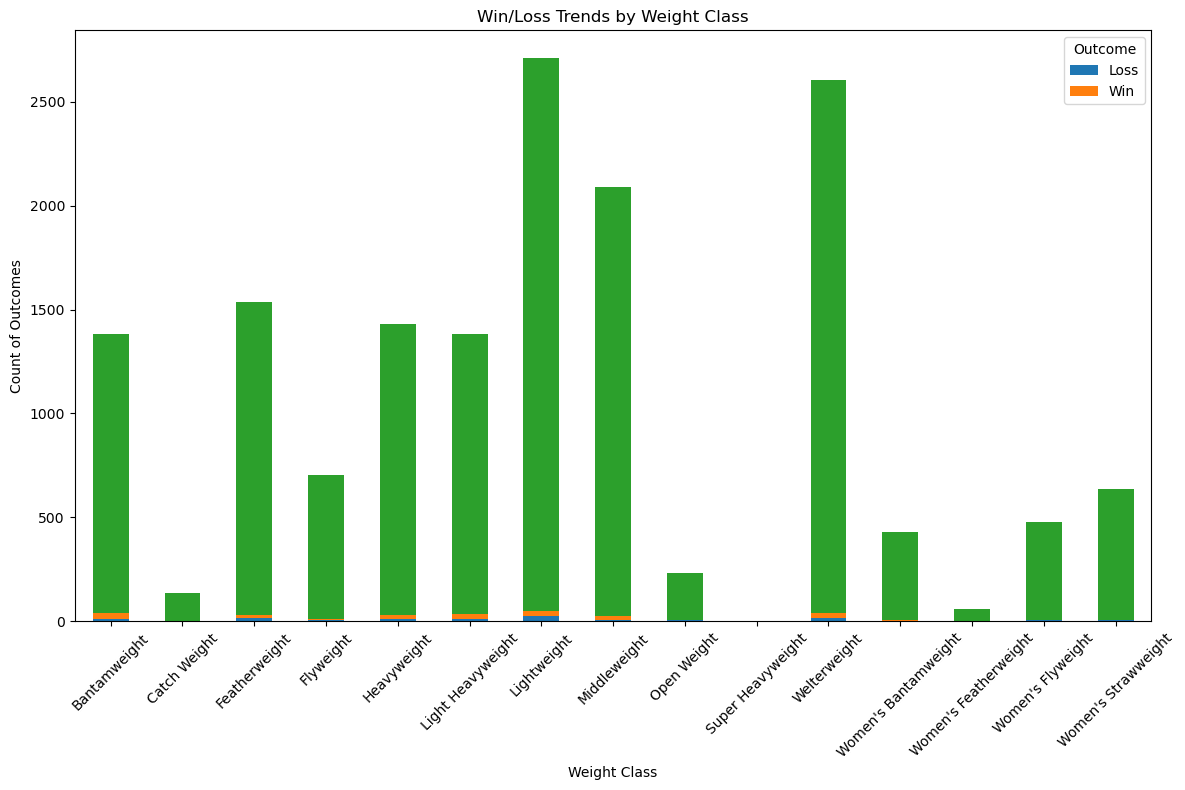

In [4]:
import matplotlib.pyplot as plt

# Calculate win/loss counts by weight class
win_loss_by_weight = events_df.groupby(['Weight_Class', 'W_L']).size().unstack(fill_value=0)

# Plotting the win/loss trends by weight class
win_loss_by_weight.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Win/Loss Trends by Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Count of Outcomes")
plt.legend(title="Outcome", labels=["Loss", "Win"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


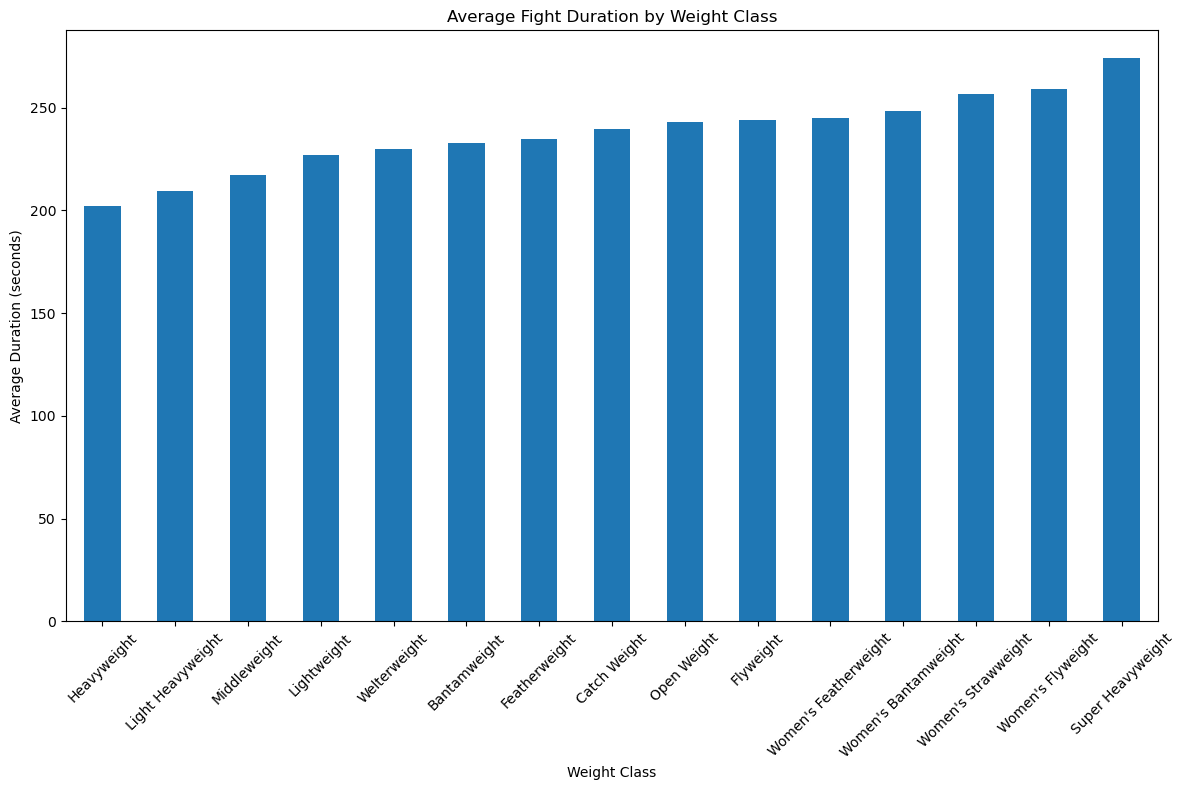

In [5]:
# Calculate the average fight duration (in seconds) by weight class
avg_fight_duration_by_weight = events_df.groupby('Weight_Class')['Time_seconds'].mean().sort_values()

# Plotting the average fight duration by weight class
plt.figure(figsize=(12, 8))
avg_fight_duration_by_weight.plot(kind='bar')
plt.title("Average Fight Duration by Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Average Duration (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


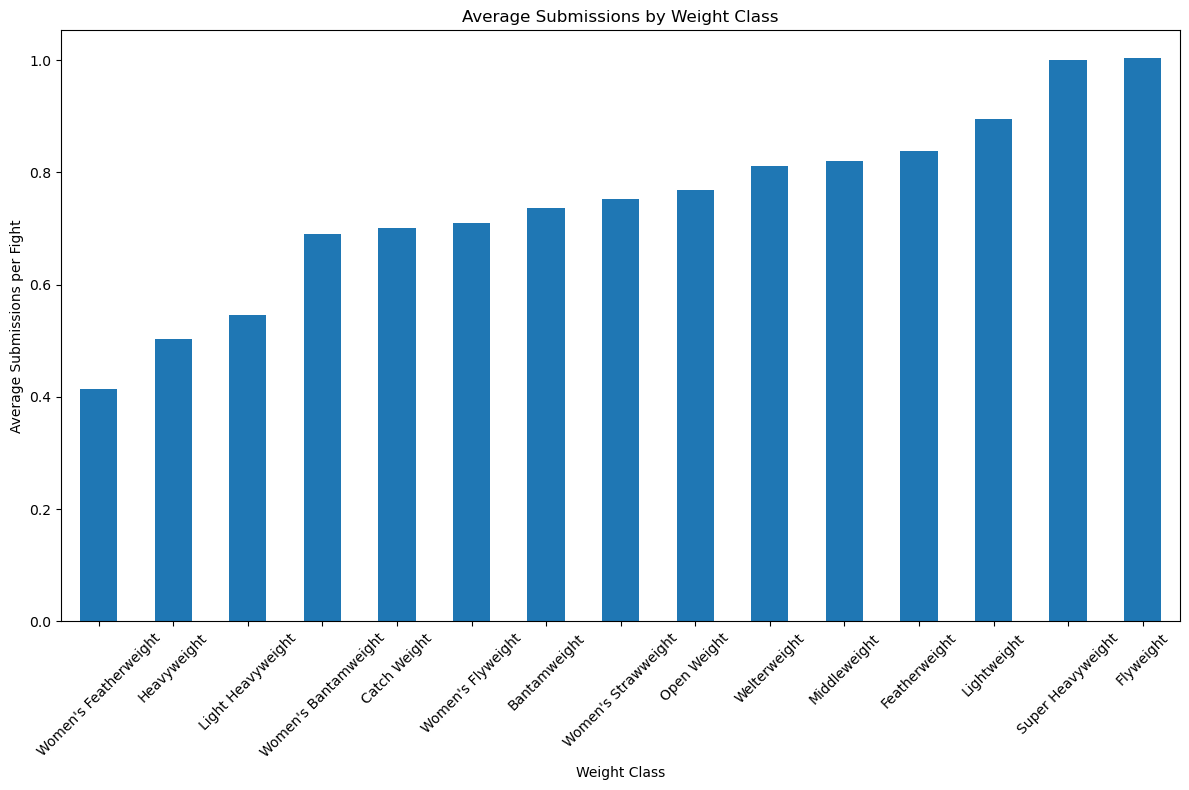

In [6]:
# Calculate the average submissions by weight class for Fighter_A and Fighter_B
# Summing both fighters' submission attempts to get total submissions per fight, then averaging by weight class
events_df['Total_SUB'] = events_df['SUB_A'] + events_df['SUB_B']
avg_submissions_by_weight = events_df.groupby('Weight_Class')['Total_SUB'].mean().sort_values()

# Plotting the average submissions by weight class
plt.figure(figsize=(12, 8))
avg_submissions_by_weight.plot(kind='bar')
plt.title("Average Submissions by Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Average Submissions per Fight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


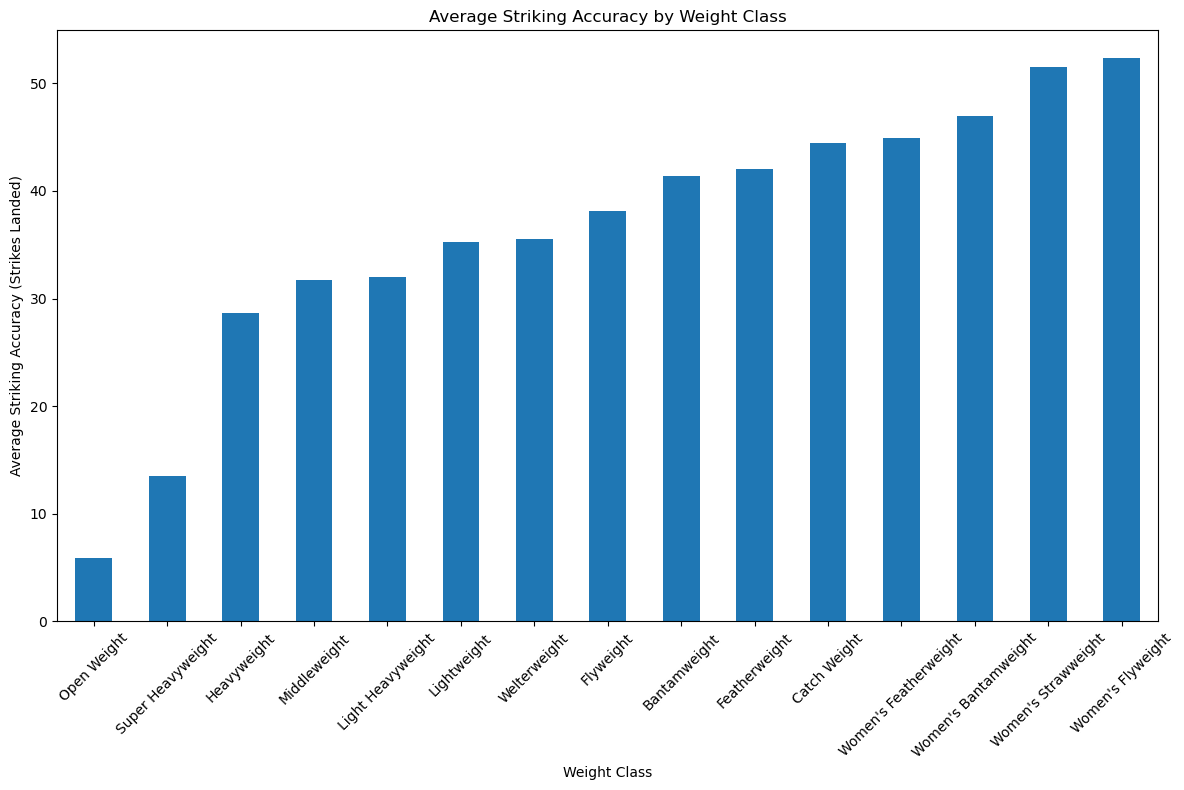

In [7]:
# Calculate the average striking accuracy by weight class for both fighters
# Taking an average of STR_A and STR_B to represent overall striking accuracy per fight in each weight class
# Also converting accuracy to percentage for readability
events_df['Total_STR'] = (events_df['STR_A'] + events_df['STR_B']) / 2

# Group by weight class to find the average striking accuracy
avg_striking_accuracy_by_weight = events_df.groupby('Weight_Class')['Total_STR'].mean().sort_values()

# Plotting the average striking accuracy by weight class
plt.figure(figsize=(12, 8))
avg_striking_accuracy_by_weight.plot(kind='bar')
plt.title("Average Striking Accuracy by Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Average Striking Accuracy (Strikes Landed)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


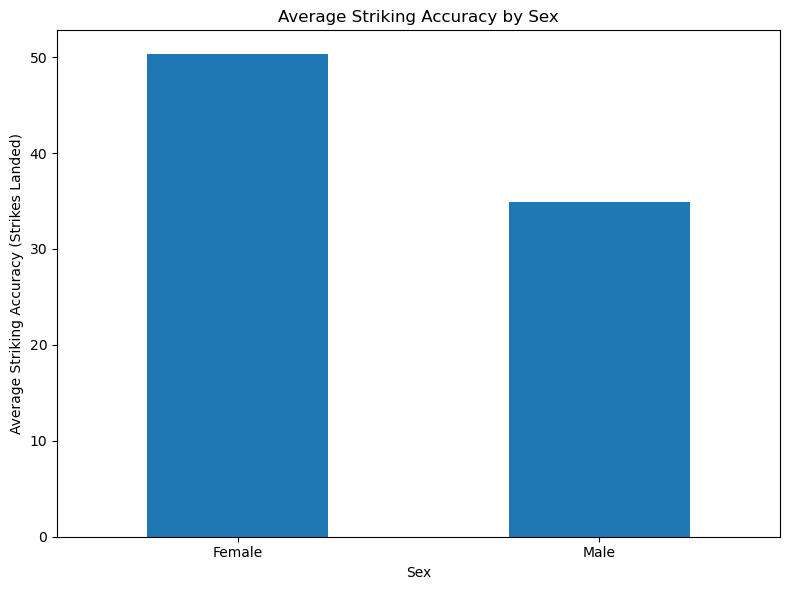

In [8]:
# Classify weight classes into male and female based on weight class naming
# Women's divisions contain "Women's" in their weight class names
events_df['Sex'] = events_df['Weight_Class'].apply(lambda x: 'Female' if "Women's" in x else 'Male')

# Calculate average striking accuracy by sex
avg_striking_accuracy_by_sex = events_df.groupby('Sex')['Total_STR'].mean()

# Plotting the average striking accuracy by sex
plt.figure(figsize=(8, 6))
avg_striking_accuracy_by_sex.plot(kind='bar')
plt.title("Average Striking Accuracy by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Striking Accuracy (Strikes Landed)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
